# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.3 MB/s eta 0:00:00
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080016 sha256=81b34880078864c7edfab7e713d47ba3ceeadc71cf1abca60505b45f9689e26c
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.3.4
    Uninstalling bokeh-3.3.4:
      Successfully uninstalled bokeh-3.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.3.8 requires bokeh<3.4.0,

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "aniketj01"
kaggle_key = "7723f380de4cac685cc79daa455158d0"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 68.0MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [50]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train['datetime'] = pd.to_datetime(train["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [51]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [52]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test['datetime'] = pd.to_datetime(test['datetime'])
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0


In [53]:
test['count'] = 0
test.to_csv('test.csv', index=False)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0


In [54]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [55]:
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train.drop(columns=['casual', 'registered']), time_limit=600, presets='best_quality' )

No path specified. Models will be saved in: "AutogluonModels/ag-20240507_150233"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240507_150233/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 199 seconds

In [56]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.140047  root_mean_squared_error      31.132316  379.629370                0.000970           0.037841            3       True         11
1   RandomForestMSE_BAG_L2  -53.415263  root_mean_squared_error      25.465286  280.162668                0.742259          44.648793            2       True         10
2          LightGBM_BAG_L2  -55.113793  root_mean_squared_error      25.054628  267.465065                0.331602          31.951190            2       True          9
3        LightGBMXT_BAG_L2  -60.608528  root_mean_squared_error      30.057485  302.991548                5.334459          67.477672            2       True          8
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.196408    0.063699   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.2817116338573,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.60852789618331,
  'LightGBM_BAG_L2': -55.1137930

### Review AutoGluon's training run with ranking of models that did the best.

### Create predictions from test dataset

In [57]:
predictions = predictor.predict(test)
predictions.head()

0    23.717676
1    43.644398
2    46.672447
3    50.245033
4    52.175198
Name: count, dtype: float32

In [58]:
predictor.leaderboard(extra_info=True, silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-53.140047,root_mean_squared_error,31.132316,379.629370,0.000970,0.037841,3,True,11,...,"{'use_orig_features': False, 'max_base_models'...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L2, LightGBMXT_BAG_L2, Li...",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 25},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L2, CatBoost_BAG_L1, Ligh...",[]
1,RandomForestMSE_BAG_L2,-53.415263,root_mean_squared_error,25.465286,280.162668,0.742259,44.648793,2,True,10,...,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[datetime.dayofweek, holiday, atemp, LightGBMX...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[CatBoost_BAG_L1, LightGBM_BAG_L1, KNeighborsU...",[WeightedEnsemble_L3]
2,LightGBM_BAG_L2,-55.113793,root_mean_squared_error,25.054628,267.465065,0.331602,31.951190,2,True,9,...,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[datetime.dayofweek, holiday, atemp, LightGBMX...",None,{'learning_rate': 0.05},{'num_boost_round': 214},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[CatBoost_BAG_L1, LightGBM_BAG_L1, KNeighborsU...",[WeightedEnsemble_L3]
3,LightGBMXT_BAG_L2,-60.608528,root_mean_squared_error,30.057485,302.991548,5.334459,67.477672,2,True,8,...,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[datetime.dayofweek, holiday, atemp, LightGBMX...",None,"{'learning_rate': 0.05, 'extra_trees': True}",{'num_boost_round': 2054},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[CatBoost_BAG_L1, LightGBM_BAG_L1, KNeighborsU...",[WeightedEnsemble_L3]
4,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.196408,0.063699,0.196408,0.063699,1,True,2,...,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[windspeed, weather, datetime.month, datetime....",None,{'weights': 'distance'},{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[RandomForestMSE_BAG_L2, WeightedEnsemble_L2, ..."
5,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.197711,0.113196,0.001303,0.049498,2,True,7,...,"{'use_orig_features': False, 'max_base_models'...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[KNeighborsDist_BAG_L1],None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[KNeighborsDist_BAG_L1],[]
6,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.057191,0.060051,0.057191,0.060051,1,True,1,...,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[windspeed, weather, datetime.month, datetime....",None,{'weights': 'uniform'},{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, RandomForestMSE_BAG_L2, ..."
7,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.626854,19.172723,0.626854,19.172723,1,True,5,...,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[windspeed, weather, datetime.month, datetime....",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, RandomForestMSE_BAG_L2, ..."
8,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,2.728903,42.975033,2.728903,42.975033,1,True,4,...,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [59]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.427048
std        89.753662
min         3.214900
25%        19.963028
50%        63.597378
75%       167.727905
max       366.547668
Name: count, dtype: float64

In [82]:
# How many negative values do we have?
negative_count = 0
for row in predictions:
    if float(row) < 0:
      negative_count += 1

print(negative_count)

0


In [ ]:
# Set them to zero


### Set predictions to submission dataframe, save, and submit

In [20]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,23.391182
1,2011-01-20 01:00:00,42.872620
2,2011-01-20 02:00:00,45.976189
3,2011-01-20 03:00:00,49.384224
4,2011-01-20 04:00:00,52.329830


In [21]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 742kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [22]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2024-05-07 14:19:06  first raw submission               pending                              
submission_new_features.csv  2024-05-07 08:11:39  new features                       complete  1.79568      1.79568       
submission.csv               2024-05-07 08:07:51  first raw submission               complete  1.79568      1.79568       
submission_new_hpo.csv       2024-05-07 07:59:57  new features with hyperparameters  complete  1.79568      1.79568       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

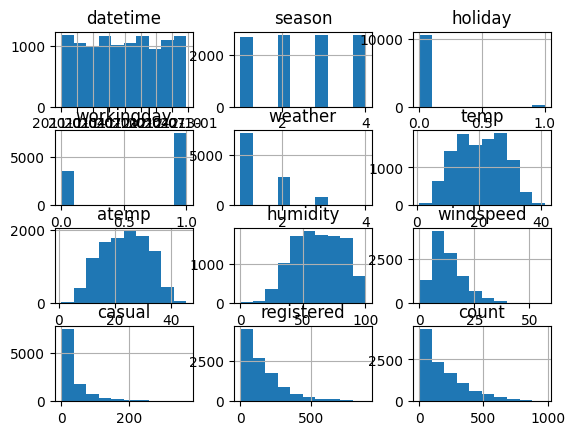

In [23]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [62]:
# create a new feature
train['year'] = train.datetime.dt.year
test['year'] = test.datetime.dt.month
train['month'] = train.datetime.dt.month
test['month'] = test.datetime.dt.month
train['day'] = train.datetime.dt.day
test['day'] = test.datetime.dt.day

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [63]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')

In [64]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

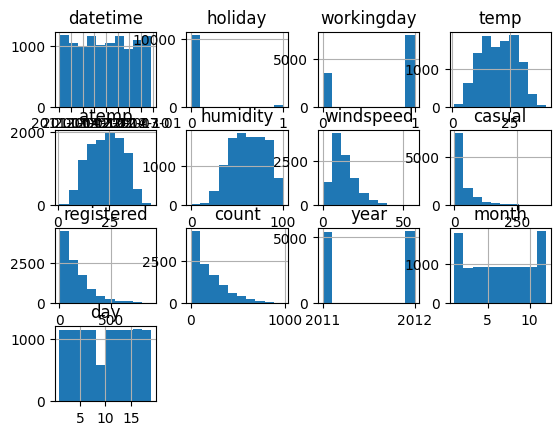

In [65]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [66]:
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train.drop(columns=['casual', 'registered']), time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240507_151947"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240507_151947/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 196 seconds

In [67]:
predictor_new_features.fit_summary()

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -54.772618  root_mean_squared_error      20.540828  366.138526                0.001225           0.057902            3       True         11
1          LightGBM_BAG_L2  -54.813447  root_mean_squared_error      13.386061  290.870089                0.516234          36.612274            2       True         10
2        LightGBMXT_BAG_L2  -60.697272  root_mean_squared_error      20.023369  329.468349                7.153542          75.210535            2       True          9
3    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.067376    0.043877                0.067376           0.043877            1       True          2
4      WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.069216    0.117959   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.17461396724218,
  'LightGBM_BAG_L1': -130.6720510216722,
  'RandomForestMSE_BAG_L1': -116.67695249614695,
  'CatBoost_BAG_L1': -133.26941882318135,
  'ExtraTreesMSE_BAG_L1': -124.64975296526119,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.6

In [68]:
predictions = predictor.predict(test)
predictions.head()

0    23.717676
1    43.644398
2    46.672447
3    50.245033
4    52.175198
Name: count, dtype: float32

In [69]:
predictions.describe()

count    6493.000000
mean      100.427048
std        89.753662
min         3.214900
25%        19.963028
50%        63.597378
75%       167.727905
max       366.547668
Name: count, dtype: float64

In [71]:
# Remember to set all negative values to zero
negative_count = 0
for col in predictions:
    if float(col) < 0:
      negative_count += 1

print(negative_count)

0


In [72]:
# Same submitting predictions
submission_new_features = pd.DataFrame()
submission_new_features["datetime"] = submission["datetime"]
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [73]:
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,23.717676
1,2011-01-20 01:00:00,43.644398
2,2011-01-20 02:00:00,46.672447
3,2011-01-20 03:00:00,50.245033
4,2011-01-20 04:00:00,52.175198


In [35]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 770kB/s]
Successfully submitted to Bike Sharing Demand

In [36]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-07 14:36:53  new features                       complete  1.80229      1.80229       
submission.csv               2024-05-07 14:19:06  first raw submission               complete  1.80229      1.80229       
submission_new_features.csv  2024-05-07 08:11:39  new features                       complete  1.79568      1.79568       
submission.csv               2024-05-07 08:07:51  first raw submission               complete  1.79568      1.79568       




```
# This is formatted as code
```

#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [74]:
hyperparameters = {
    'GBM': {'num_boost_round': 100},
    'RF': {'n_estimators': 100},
    'CAT': {'iterations': 100}
}
predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit( train_data=train.drop(columns=['casual', 'registered']), time_limit=600, presets='best_quality', hyperparameters=hyperparameters, hyperparameter_tune_kwargs='auto')

No path specified. Models will be saved in: "AutogluonModels/ag-20240507_153053"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240507_153053/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 178 seconds

In [75]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -117.215079  root_mean_squared_error       0.014545  276.920150                0.001303           0.085715            3       True         13
1    CatBoost_BAG_L2/T2 -117.615589  root_mean_squared_error       0.012575  182.017225                0.002771          28.117057            2       True         12
2    LightGBM_BAG_L2/T1 -117.639856  root_mean_squared_error       0.010014  191.335855                0.000210          37.435688            2       True          8
3    CatBoost_BAG_L2/T1 -117.839979  root_mean_squared_error       0.009996  182.027386                0.000192          28.127218            2       True         11
4   WeightedEnsemble_L2 -118.056318  root_mean_squared_error       0.010205   35.704976                0.001

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T2': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T3': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L2/T2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -135.5359111647168,
  'LightGBM_BAG_L1/T2': -131.6628306839507,
  'RandomForest_BAG_L1': -118.06272977169888,
  'CatBoost_BAG_L1/T1': -140.5796110721608,
  'CatBoost_BAG_L1/T2': -139.26545422493604,
  'CatBoost_BAG_L1/T3': -141.85050000395796

In [76]:
predictions = predictor.predict(test)
predictions.head()

0    23.717676
1    43.644398
2    46.672447
3    50.245033
4    52.175198
Name: count, dtype: float32

In [77]:
predictions.describe()

count    6493.000000
mean      100.427048
std        89.753662
min         3.214900
25%        19.963028
50%        63.597378
75%       167.727905
max       366.547668
Name: count, dtype: float64

In [79]:
# Remember to set all negative values to zero
negative_count = 0
for col in predictions:
    if float(col) < 0:
      negative_count += 1

print(negative_count)

0


In [80]:
# Same submitting predictions
submission_new_hpo = pd.DataFrame()
submission_new_hpo["datetime"] = submission["datetime"]
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [81]:
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,23.717676
1,2011-01-20 01:00:00,43.644398
2,2011-01-20 02:00:00,46.672447
3,2011-01-20 03:00:00,50.245033
4,2011-01-20 04:00:00,52.175198


In [44]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 761kB/s]
Successfully submitted to Bike Sharing Demand

In [45]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-07 14:57:13  new features with hyperparameters  pending                              
submission_new_features.csv  2024-05-07 14:36:53  new features                       complete  1.80229      1.80229       
submission.csv               2024-05-07 14:19:06  first raw submission               complete  1.80229      1.80229       
submission_new_features.csv  2024-05-07 08:11:39  new features                       complete  1.79568      1.79568       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

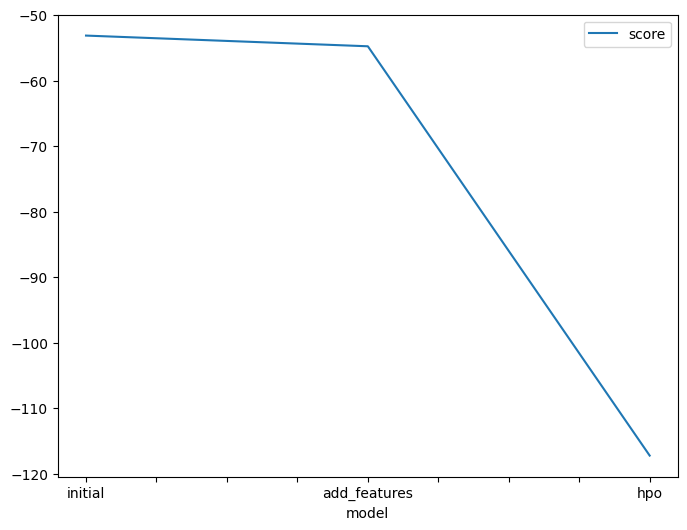

In [83]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.140047, -54.772618 , -117.215079 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

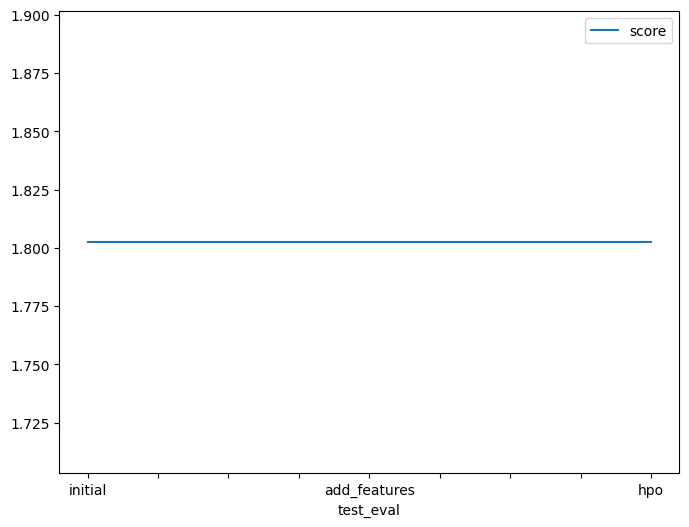

In [84]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80229 , 1.80229 , 1.80229]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [85]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['time_limit', 'time_limit', 'GBM'],
    "hpo2": ['presets', 'presets', 'RF'],
    "hpo3": ['eval_metric', 'eval_metric', 'CAT'],
    "score": [1.80229 , 1.80229 , 1.80229]
})

,model,hpo1,hpo2,hpo3,score
0,initial,time_limit,presets,eval_metric,1.80229
1,add_features,time_limit,presets,eval_metric,1.80229
2,hpo,GBM,RF,CAT,1.80229
